In [20]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [0]:
import os.path
if not os.path.exists('mlp_helper.py'):
    !wget https://github.com/lab-ml-itba/MLP-2019/raw/master/mlp_helper.py

In [0]:
from matplotlib import pyplot as plt
import numpy as np
from mlp_helper import draw_neural_net, return_weights_notation

Interesante articulo sobre Universal Aproximation Theorem:

http://neuralnetworksanddeeplearning.com/chap4.html

# Pruebas a realizar
- hidden units 2, 3, 6
- Activation sigmoid y relu

# Dataset

In [0]:
np.random.seed(10)
# X = np.random.normal(0, 10, 100)
X = np.linspace(-20, 20, 200)

In [0]:
sigma = 1
# y = np.abs(X) + np.random.normal(0, sigma, len(X))
y = np.cos(X/4) + np.random.normal(0, 0.01, len(X))

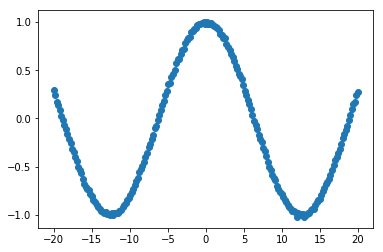

In [62]:
plt.scatter(X, y)

# Model

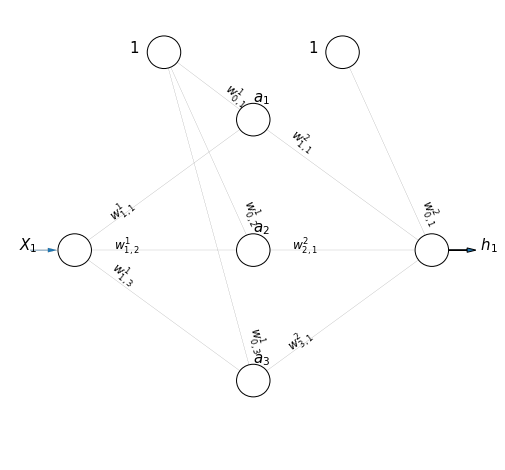

In [71]:
input_dim = 1
hidden_units = 3
outputs = 1
activation = 'sigmoid'

fig, ax = plt.subplots(1,1,figsize=(8, 8))
shape = [input_dim,hidden_units,outputs]
weights, biases = return_weights_notation(shape)
draw_neural_net(ax, 0.1, 0.9, 0, 0.9, shape, weights, biases)

In [0]:
from keras.models import Sequential
from keras.layers import Dense

In [73]:
model = Sequential()
model.add(Dense(hidden_units, input_shape=(input_dim,), activation=activation))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 3)                 6         
_________________________________________________________________
dense_28 (Dense)             (None, 1)                 4         
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


In [0]:
from keras.optimizers import Adam, SGD, rmsprop
model.compile(Adam(lr=0.1), loss='mse', metrics=['mae'])

# Entrenamiento del modelo

In [75]:
model.fit(X, y, verbose=0, epochs=200)

In [76]:
print(model.metrics_names)
print(model.evaluate(X, y))

['loss', 'mean_absolute_error']
200/200 [==============================] - 0s 1ms/step
[0.0922960263490677, 0.21550885915756227]


In [0]:
y_pred = model.predict(X)

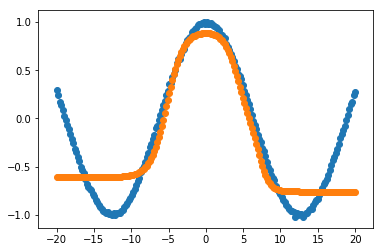

In [78]:
plt.scatter(X, y)
plt.scatter(X, y_pred)

In [57]:
model.get_weights()

[array([[-1.1064684 , -0.06414599,  1.127281  ,  0.02981228,  0.06042663,
          0.01728964]], dtype=float32),
 array([-0.83010715, -1.8500986 , -0.98138344, -1.1167346 , -1.9246957 ,
        -1.8336414 ], dtype=float32),
 array([[ 0.88218284],
        [-0.01611454],
        [ 0.898101  ],
        [-0.01160572],
        [-0.01619197],
        [-0.12366574]], dtype=float32),
 array([0.9062375], dtype=float32)]

In [0]:
def get_sub_model(model, index, idx1=0, idx2=1, activation='sigmoid', input_dim=2):
    layer_1_w = model.get_weights()[idx1]
    layer_1_b = model.get_weights()[idx2]
    sub_model_weights = [np.array([layer_1_w[:,index]]).T, np.array([layer_1_b[index]])]
    sub_model = Sequential()
    sub_model.add(Dense(1, input_shape=(input_dim,), activation=activation))
    sub_model.set_weights(sub_model_weights)
    sub_model.compile(Adam(lr=0.1), loss='binary_crossentropy', metrics=['accuracy'])
    return sub_model

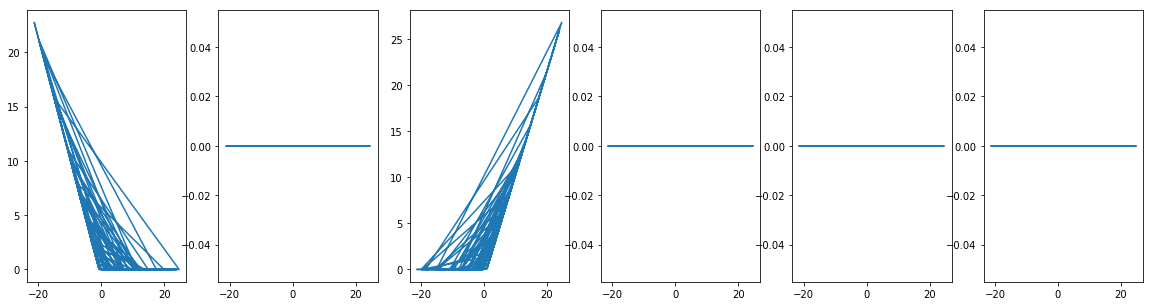

In [59]:
f, ax = plt.subplots(1, hidden_units, figsize=(20,5))
sub_models = []
preds = []
for i in range(hidden_units):
    sub_model = get_sub_model(model, i, activation=activation, input_dim=1)
    sub_models.append(sub_model)
    preds.append(sub_model.predict(X))
    ax[i].plot(X, preds[i])

# Ejemplo con hidden_units=3 Activation sigmoid

![sigmoid_aprox_3hidden.png](https://github.com/edugarg/MLP-2019/blob/master/sigmoid_aprox_3hidden.png?raw=1)
![sigmoid_aprox_3hidden_all.png](https://github.com/edugarg/MLP-2019/blob/master/sigmoid_aprox_3hidden_all.png?raw=1)